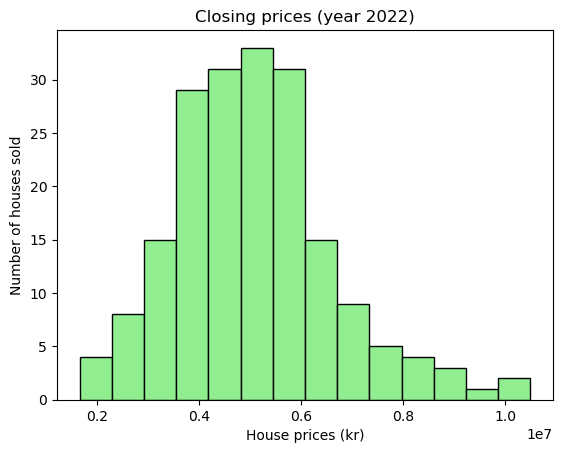

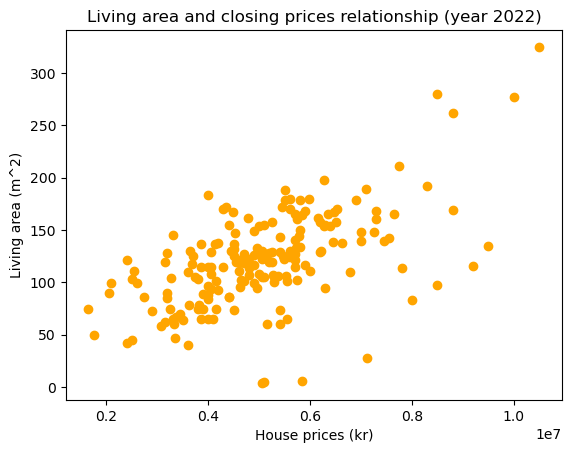

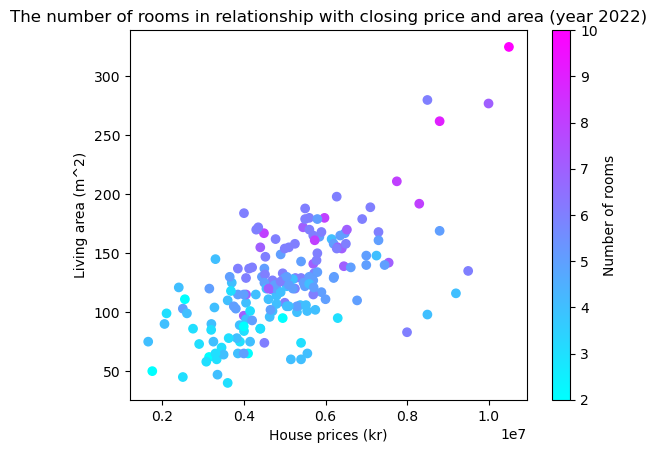

In [50]:
import pandas as pd
from numpy import percentile
import math
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('HousePrices.csv')

data_2022 = df[df['Date of Sale'].str.contains("2022")]

closing_price_2022 = data_2022['Closing Price']

# Five number summary
five_number_summary = closing_price_2022.describe().loc[['min', '25%', '50%', '75%', 'max']]

# Histogram
min_value = five_number_summary['min']
max_value = five_number_summary['max']

bin_count = round(math.sqrt(closing_price_2022.count()))
bin_width = (max_value - min_value)/bin_count

plt.hist(closing_price_2022, bin_count, color='lightgreen', edgecolor = 'black')
plt.title('Closing prices (year 2022)')
plt.xlabel('House prices (kr)')
plt.ylabel('Number of houses sold')
plt.show()


# Scatter plot
area_column = data_2022['Area']
if area_column.str.contains('\+').any():
    living_area = area_column.str.split('\+').str.get(0).str.strip()
    data_2022.loc[area_column.str.contains('\+'), 'Area'] = living_area
    
data_2022.loc[:, 'Area'] = data_2022['Area'].astype(float)

plt.scatter(data_2022['Closing Price'], data_2022['Area'], color = 'orange')
plt.title('Living area and closing prices relationship (year 2022)')
plt.xlabel('House prices (kr)')
plt.ylabel('Living area (m^2)')
plt.show()

# Final plot
plt.scatter(data_2022['Closing Price'],data_2022['Area'], c=data_2022['Rooms'], cmap = 'cool')
plt.colorbar(label = 'Number of rooms')
plt.title('The number of rooms in relationship with closing price and area (year 2022)')
plt.xlabel('House prices (kr)')
plt.ylabel('Living area (m^2)')
plt.show()


